# **Phishing Website Detection by Machine Learning Techniques**

## **1. Objective:**
A phishing website is a common social engineering method that mimics trustful uniform resource locators (URLs) and webpages. The objective of this project is to train machine learning models and deep neural nets on the dataset created to predict phishing websites. Both phishing and benign URLs of websites are gathered to form a dataset and from them required URL and website content-based features are extracted. The performance level of each model is measures and compared.

*This project is worked on Google Collaboratory.*<br>
*The required packages for this notebook are imported when needed.*

## **2. Loading Data:**

The features are extracted and store in the csv file. The working of this can be seen in the 'URLfeatureExtraction.ipynb' file.

The reulted csv file is uploaded to this notebook and stored in the dataframe.

In [ ]:
# importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving urldata.csv to urldata.csv


In [ ]:
# Loading the data
data0 = pd.read_csv('urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,Prefix/Suffix,Label
0,graphicriver.net,0,0,1,1,0,0,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0
2,hubpages.com,0,0,1,1,0,0,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0
4,icicibank.com,0,0,1,3,0,0,0,0


## **3. Familiarizing with Data**
In this step, few dataframe methods are used to look into the data and its features.

In [ ]:
# Checking the shape of the dataset
data0.shape

(10000, 9)

In [ ]:
# Checking the size of the dataset
data0.size

90000

In [ ]:
# Checking Columns names in Dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'Prefix/Suffix', 'Label'],
      dtype='object')

In [ ]:
# Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   Prefix/Suffix  10000 non-null  int64 
 8   Label          10000 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 703.2+ KB


## **4. Visualizing the data**
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

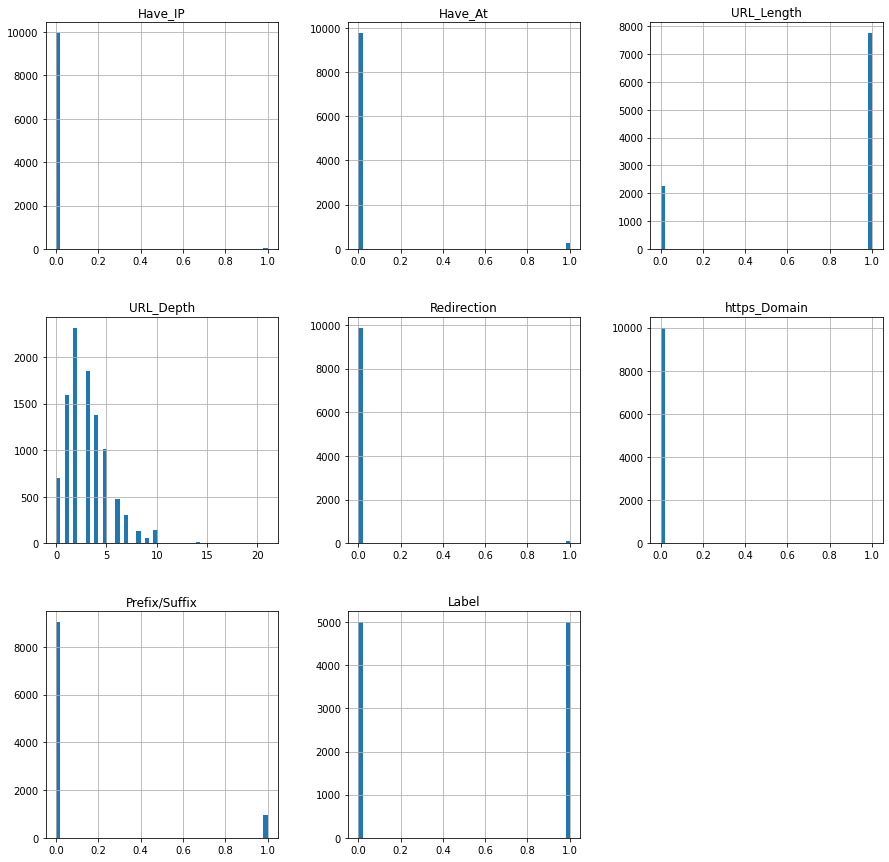

In [ ]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

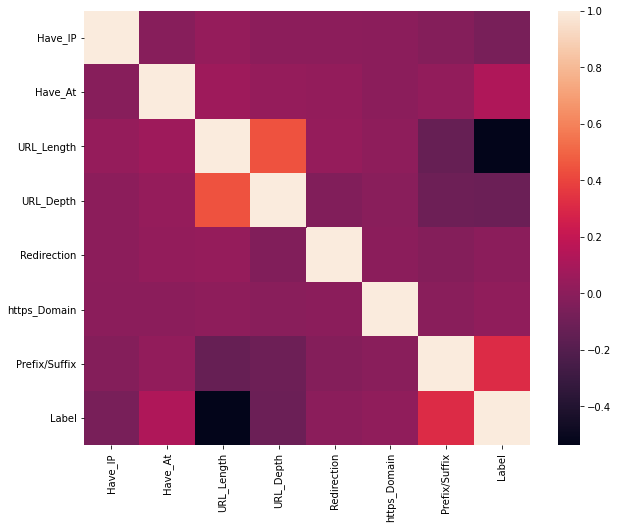

In [ ]:
#Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data0.corr())
plt.show()

## **5. Data Preprocessing & EDA**
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [ ]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,Prefix/Suffix,Label
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,0.004800,0.02460,0.775300,3.079200,0.01300,0.000300,0.096600,0.500000
std,0.069119,0.15491,0.417405,2.136582,0.11328,0.017319,0.295427,0.500025
min,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,1.000000,2.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.00000,1.000000,3.000000,0.00000,0.000000,0.000000,0.500000
75%,0.000000,0.00000,1.000000,4.000000,0.00000,0.000000,0.000000,1.000000
max,1.000000,1.00000,1.000000,21.000000,1.00000,1.000000,1.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' column. The Domain column doesnt have any significance to the machine learning model training. So dropping the 'Domain' column from the dataset.

In [ ]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

In [ ]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
Prefix/Suffix    0
Label            0
dtype: int64

In the feature extraction file, the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 5000 rows of legitimate url data & bottom 5000 of phishing url data.

To even out the distribution while splitting the data into training & testing sets, we need to shuffle it. This even evades the case of overfitting while model training.

In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,Prefix/Suffix,Label
0,0,0,0,1,0,0,0,1
1,0,0,1,3,0,0,0,0
2,0,0,1,3,0,0,0,0
3,0,0,0,0,0,0,0,1
4,0,0,1,2,0,0,0,1


By this, the data is throughly preprocessed & is ready for training.



## **6. Splitting the Data**

In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 7), (10000,))

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 7), (2000, 7))

## **7. Machine Learning Models & Training**

From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression. 

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:
* Decision Tree
* Random Forest
* Support Vector Machines

In [ ]:
#importing packages
from sklearn.metrics import accuracy_score

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 5))
  acc_test.append(round(b, 5))

### **Decision Tree Classifier**
 Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.
 
In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [ ]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.5f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.5f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.80588
Decision Tree: Accuracy on test Data: 0.79750


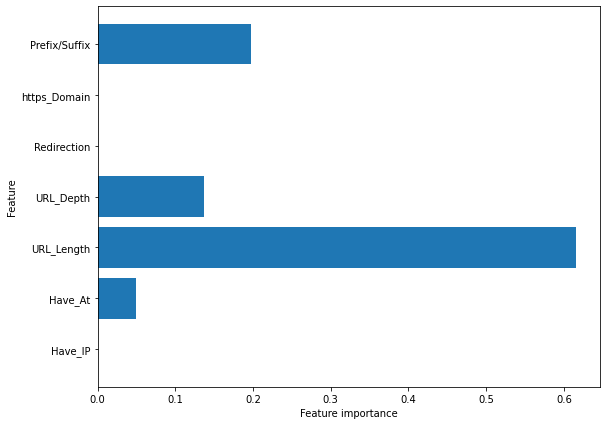

In [ ]:
#checking the feature importance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### **Random Forest Classifier**
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.5f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.5f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.79363
Random forest: Accuracy on test Data: 0.79100


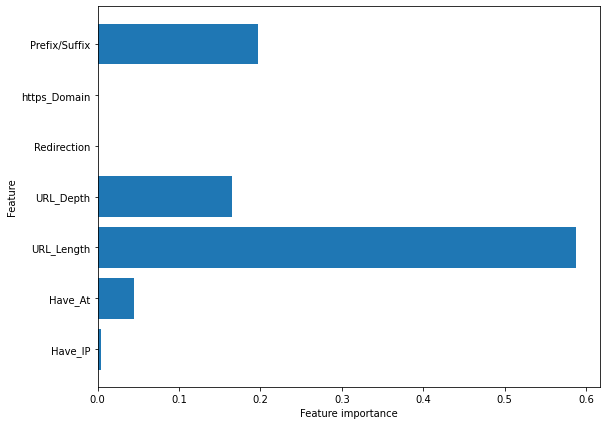

In [ ]:
#checking the feature importance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### **Support Vector Machines**

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [ ]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)

#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [ ]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.5f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.5f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.79363
SVM : Accuracy on test Data: 0.79100


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

## **Comparision of Models**
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.80588,0.7975
1,Random Forest,0.79362,0.7910
2,SVM,0.79362,0.7910


In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.80588,0.7975
1,Random Forest,0.79362,0.7910
2,SVM,0.79362,0.7910


##**CONCLUSION**
For the above comparision, it is clear that the **DECISION TREE** works well with this dataset.
